In [47]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


# Preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [32]:
df = pd.read_csv('../data/car_price.csv')

# Exploration et nettoyage des données

### Affichage des 10 premières lignes

In [33]:
df.head(10)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1.0,Tesla,2016.0,2.3,Petrol,Manual,114832.0,New,26613.92,Model X
1,2.0,BMW,2018.0,4.4,Electric,Manual,143190.0,Used,14679.61,5 Series
2,3.0,Audi,2013.0,4.5,Electric,Manual,181601.0,New,44402.61,A4
3,4.0,Tesla,2011.0,4.1,Diesel,Automatic,68682.0,New,86374.33,Model Y
4,5.0,Ford,2009.0,2.6,Diesel,Manual,223009.0,Like New,73577.10,Mustang
5,6.0,Audi,2019.0,2.4,Diesel,Automatic,246553.0,Like New,88969.76,Q7
6,7.0,Audi,2020.0,4.0,Electric,Automatic,135486.0,Used,63498.75,Q5
7,8.0,Tesla,2017.0,5.3,Hybrid,Automatic,83030.0,New,17381.19,Model Y
8,9.0,Honda,2023.0,5.7,Electric,Manual,120360.0,Like New,15905.62,Civic
9,10.0,Ford,2010.0,1.5,Electric,Automatic,135009.0,Like New,9560.22,Explorer


### On regarde le type de chacune des colonnes

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2250 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Car ID        2250 non-null   float64 
 1   Brand         2250 non-null   category
 2   Year          2250 non-null   int64   
 3   Engine Size   2250 non-null   float64 
 4   Fuel Type     2250 non-null   category
 5   Transmission  2250 non-null   category
 6   Mileage       2250 non-null   int64   
 7   Condition     2250 non-null   category
 8   Price         2250 non-null   float64 
 9   Model         2250 non-null   category
dtypes: category(5), float64(3), int64(2)
memory usage: 118.5 KB


### Suppression des valeurs null

En regardant le dataset, lorsqu'il y a des valeurs null c'est tout une ligne. On peut fonc juste les supprimer sans les remplacer par des valeurs particulières.

In [35]:
df.dropna(inplace=True)

### Transformation des type 'object' en 'category' et de certains 'float' en 'int'

In [ ]:
# Conversion en category
for current_column in df.select_dtypes(include=['object']).columns:
    df[current_column] = df[current_column].astype('category')
    
# Conversion en int
df['Year'] = df['Year'].astype(int)
df['Mileage'] = df['Mileage'].astype(int)

### Changement de tous le type de fuel de Tesla en électrique

Il s'agit d'une marque dde voiture n'en produisant uniquement des électriques. C'est pourquoi on change tous leur type de fuel en électrique.

In [37]:
df.loc[df['Brand'] == 'Tesla', 'Fuel Type'] = 'Electric'

df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1.0,Tesla,2016,2.3,Electric,Manual,114832,New,26613.92,Model X
1,2.0,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3.0,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4.0,Tesla,2011,4.1,Electric,Automatic,68682,New,86374.33,Model Y
4,5.0,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


### Prix de base en USD. On les convertie en EUR

In [38]:
# A adapter en fonction du taux actuel
df['Price'] = (df['Price'] * 0.86).round(2)

df['Price'].head()

0    22887.97
1    12624.46
2    38186.24
3    74281.92
4    63276.31
Name: Price, dtype: float64

### Suppression des doublons

In [39]:
df = df.drop_duplicates()

### Affichage d'informations importante pour chaque colonne

In [46]:
df.describe(include='all')

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
count,2250.000000,2250,2250.000000,2250.000000,2250,2250,2250.000000,2250,2250.000000,2250
unique,NaN,7,NaN,NaN,4,2,NaN,3,NaN,28
top,NaN,Toyota,NaN,NaN,Electric,Manual,NaN,Used,NaN,Corolla
freq,NaN,346,NaN,NaN,775,1184,NaN,769,NaN,97
mean,1251.243556,NaN,2011.577778,3.485467,NaN,NaN,150236.178222,NaN,45155.911916,NaN
std,725.637358,NaN,6.980468,1.427690,NaN,NaN,88150.746556,NaN,23419.878709,NaN
min,1.000000,NaN,2000.000000,1.000000,NaN,NaN,15.000000,NaN,4309.690000,NaN
25%,627.250000,NaN,2005.000000,2.300000,NaN,NaN,71178.500000,NaN,24927.145000,NaN
50%,1249.500000,NaN,2012.000000,3.450000,NaN,NaN,149762.000000,NaN,45997.305000,NaN
75%,1875.250000,NaN,2018.000000,4.700000,NaN,NaN,226299.000000,NaN,64981.892500,NaN


### Valeurs aberrantes

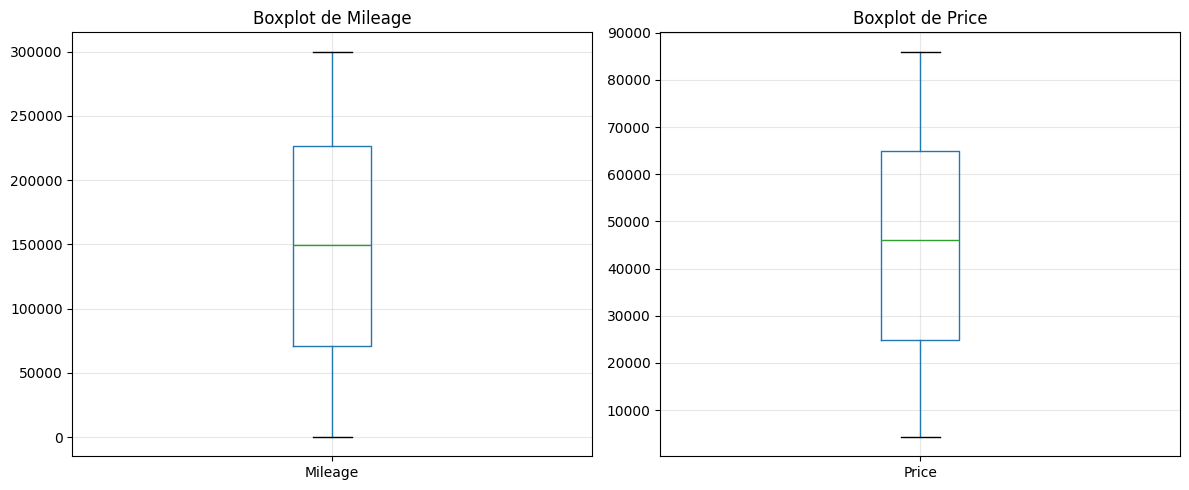

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df.boxplot(column='Mileage', ax=axes[0])
axes[0].set_title('Boxplot de Mileage')
axes[0].grid(True, alpha=0.3)

df.boxplot(column='Price', ax=axes[1])
axes[1].set_title('Boxplot de Price')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

On s'aperçoit pour la colonne 'Price' et 'Mileage' qu'il n'y a aucune valeur aberrante. Il n'y a donc aucun travail à faire sur des valeurs spécifiques.

### Matrice de corrélation

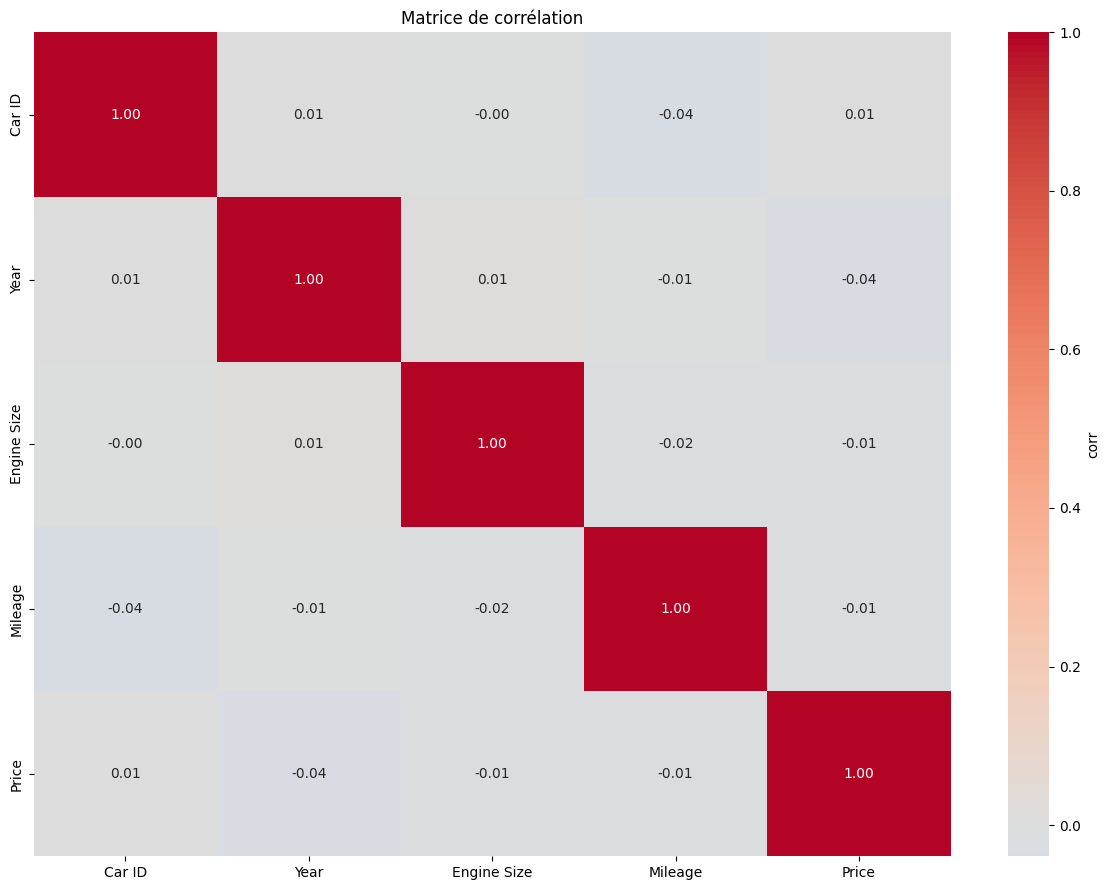

In [54]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
correlation = df[numeric_columns].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation, cmap="coolwarm", center=0, annot=True, fmt=".2f",
            cbar_kws={"label": "corr"})
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

On considère qu'il y a une forte corrélation à partir de 0.80, dans notre cas toute les valeurs sont bien en-dessous. ON ne va donc supprimer aucune valeur en fonction de la matrice.

### Test de Chi et V de Cramér

Le **Test de Chi** nous permet de voir si des colonnes catégorielles ont un lien entre elles:  
Si p_value < 0.05 -> dépendance statistiquement significative.   
Si p_value >= 0.05 -> pas de relation détectable  

Tandis que le **V de Cramér** va mesurer la force de ce lien:  
Plus la valeur est proche de 1 et plus le lien est fort  


Vous pouvez modifier la valeur de 'target' par une autre colonne categorielle pour vois ses corrélations avec les autres colonnes.

In [55]:
target = "Brand"
categories_columns = df.select_dtypes(include=["category"]).columns
categories_columns = [current_category for current_category in categories_columns if current_category != target]

results = []
for current_column in categories_columns:
    table = pd.crosstab(df[target], df[current_column])
    chi2, p, dof, _ = chi2_contingency(table)
    n = table.to_numpy().sum()
    r, c = table.shape
    v = np.sqrt(chi2 / (n * (min(r - 1, c - 1))))
    results.append((current_column, p, v))

chi2_df = pd.DataFrame(results, columns=["variable", "p_value", "v_cramers"])\
           .sort_values("p_value")

display(chi2_df)

,variable,p_value,v_cramers
3,Model,0.000000e+00,1.000000
0,Fuel Type,2.714703e-138,0.323458
2,Condition,4.390303e-01,0.051818
1,Transmission,8.887899e-01,0.032062


C'était pertinant de faire le test pour la variable **Brand** ou **Model**.  
Dans notre cas on l'a fait pour Brand. On peur voir avec le Test de Chi qu'il y a une forte corrélation avec les variables **Model** et **Fuel Type**.  
Model -> p_value ≃ 0. 
Fuel Type -> p_value ≃ 2.714703e-138. 
Ces deux valeurs sont inférieurs à 0.05. 

Lorsqu'on regarde ensuite le **V de Cramér**, on voit que le lien entre Model et Brand est de 1, ce qui représente la plus grande force. Il faudra donc supprimer une des deux colonnes.



### Distribution des valeurs numériques

### Distribution des valeurs catégorielles

### Graphiques pertinants

### Colonnes à supprimer

### Colonnes à modifier

# Preprocessing